In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import rasterio
import numpy as np

In [2]:
elevation = rasterio.open('C:/Users/parke/DefaultFiles/Documents/ArcGIS/Projects/lamprey2/Elevation.tif')
slope = rasterio.open('C:/Users/parke/DefaultFiles/Documents/ArcGIS/Projects/lamprey2/Slope.tif')
aspect = rasterio.open('C:/Users/parke/DefaultFiles/Documents/ArcGIS/Projects/lamprey2/Aspect.tif')
hillshade = rasterio.open('C:/Users/parke/DefaultFiles/Documents/ArcGIS/Projects/lamprey2/Hillshade.tif')
streamdensity = rasterio.open('C:/Users/parke/DefaultFiles/Documents/ArcGIS/Projects/lamprey2/HDStreamDensity.tif')
canopycover = rasterio.open('C:/Users/parke/GISLampreyAnalysis/Data/CanopyCover_Projecte_1.tif')
foresttype = rasterio.open('C:/Users/parke/GISLampreyAnalysis/Data/ForestTypeReclass_Project.tif')
watershed_boundary = gpd.read_file('C:/Users/parke/GISLampreyAnalysis/Data/WatershedBoundary.shp')
sample_sites = gpd.read_file('C:/Users/parke/GISLampreyAnalysis/Data/SampleSites_Streams.shp')

In [57]:
elevation.shape

(49958, 26543)

In [3]:
samplearea = gpd.sjoin(sample_sites, watershed_boundary, how="inner", op="within")

C:\Users\parke\.lsdm\lib\site-packages\IPython\core\interactiveshell.py:3400: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [4]:
import os
import glob

path = 'C:/Users/parke/GISLampreyAnalysis/Data'

coord_list = [(x,y) for x,y in zip(samplearea['geometry'].x , samplearea['geometry'].y)]
for filename in glob.glob(os.path.join(path, 'Elevation.tif')):
    with rasterio.open(os.path.join(os.getcwd(), filename)) as f: 
        samplearea[str(filename.split('\\')[-1][:-4])] = [sample[0] for sample in f.sample(coord_list)]

In [5]:
def addraster(file):
    for filename in glob.glob(os.path.join(path, file)):
        with rasterio.open(os.path.join(os.getcwd(), filename)) as f: 
            samplearea[str(filename.split('\\')[-1][:-4])] = [sample[0] for sample in f.sample(coord_list)]

In [6]:
addraster('Aspect.tif')
addraster('Slope.tif')
addraster('Hillshade.tif')
addraster('HDStreamDensity.tif')
addraster('CanopyCover_Projecte_1.tif')
addraster('ForestTypeReclass_Project.tif')

In [7]:
pd.set_option('display.max_columns',None)

In [8]:
#samplearea

In [9]:
samplearea = samplearea[samplearea['Lampetra_p']!='ND']
samplearea = samplearea[samplearea['Pacific_La']!='ND']

In [10]:
samplearea.Lampetra_p.replace(('Y', 'N'), (1, 0), inplace=True)
samplearea.Pacific_La.replace(('Y', 'N'), (1, 0), inplace=True)

In [11]:
features = ['Elevation','Slope','Aspect','Hillshade','HDStreamDensity','ForestTypeReclass_Project','CanopyCover_Projecte_1']
corr_matrix = samplearea[['Lampetra_p','Pacific_La']+features].corr()
corr_matrix

,Lampetra_p,Pacific_La,Elevation,Slope,Aspect,Hillshade,HDStreamDensity,ForestTypeReclass_Project,CanopyCover_Projecte_1
Lampetra_p,1.000000,0.190195,-0.384849,-0.128970,-0.090614,0.057068,0.249227,-0.064487,-0.189287
Pacific_La,0.190195,1.000000,-0.160360,-0.001326,0.049905,0.004063,-0.109539,0.126136,-0.159154
Elevation,-0.384849,-0.160360,1.000000,0.251173,0.008497,-0.190609,-0.347061,0.074287,0.218076
Slope,-0.128970,-0.001326,0.251173,1.000000,0.041573,-0.918758,-0.194041,0.157485,0.026369
Aspect,-0.090614,0.049905,0.008497,0.041573,1.000000,0.154090,-0.066597,-0.057907,-0.024536
Hillshade,0.057068,0.004063,-0.190609,-0.918758,0.154090,1.000000,0.103582,-0.128257,0.036830
HDStreamDensity,0.249227,-0.109539,-0.347061,-0.194041,-0.066597,0.103582,1.000000,-0.242073,-0.184299
ForestTypeReclass_Project,-0.064487,0.126136,0.074287,0.157485,-0.057907,-0.128257,-0.242073,1.000000,0.211902
CanopyCover_Projecte_1,-0.189287,-0.159154,0.218076,0.026369,-0.024536,0.036830,-0.184299,0.211902,1.000000


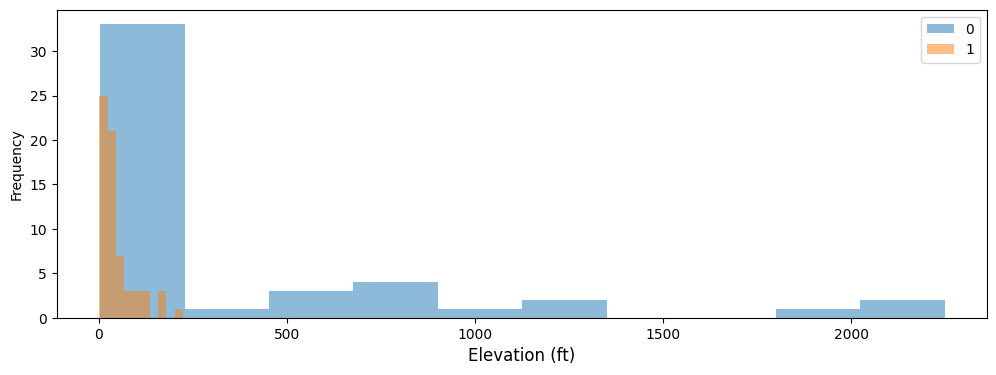

In [12]:
samplearea.groupby('Lampetra_p')['Elevation'].plot.hist(legend=True, alpha=0.5, figsize=(12,4));
plt.xlabel('Elevation (ft)', size= 'large');

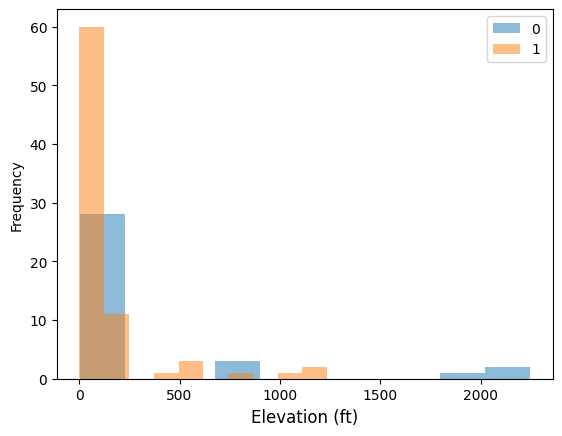

In [13]:
samplearea.groupby('Pacific_La')['Elevation'].plot.hist(legend=True, alpha=0.5);
plt.xlabel('Elevation (ft)', size= 'large');

In [14]:
samplearea[samplearea['Lampetra_p'] == 0][features].describe()

,Elevation,Slope,Aspect,Hillshade,HDStreamDensity,ForestTypeReclass_Project,CanopyCover_Projecte_1
count,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,358.246796,7.666543,162.489362,212.276596,0.545483,1.893617,4379.617021
std,575.611206,10.672961,84.137794,30.676930,0.670790,0.758547,3076.557630
min,3.737134,0.173159,11.000000,91.000000,0.002722,1.000000,-1.000000
25%,16.702435,1.568508,92.500000,211.000000,0.087841,1.000000,788.500000
50%,54.453175,4.047372,181.000000,226.000000,0.384590,2.000000,4799.000000
75%,566.891846,8.196589,199.000000,228.500000,0.751951,2.000000,7218.500000
max,2248.142334,53.770729,358.000000,237.000000,3.846996,3.000000,8919.000000


In [15]:
samplearea[samplearea['Pacific_La'] == 1][features].describe()

,Elevation,Slope,Aspect,Hillshade,HDStreamDensity,ForestTypeReclass_Project,CanopyCover_Projecte_1
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,133.962692,6.407537,155.924051,214.113924,0.666178,1.898734,3350.582278
std,253.243134,7.592024,92.881200,26.280532,0.564852,0.841167,3101.645323
min,1.184812,0.147298,11.000000,116.000000,0.002722,1.000000,-1.000000
25%,19.110085,1.132998,81.000000,212.500000,0.369161,1.000000,-1.000000
50%,37.570122,4.178055,148.000000,225.000000,0.568303,2.000000,3388.000000
75%,118.560074,7.404320,202.500000,229.000000,0.834841,3.000000,5886.000000
max,1235.279785,32.649826,348.000000,237.000000,3.846996,3.000000,8919.000000


In [16]:
import sklearn
from sklearn.preprocessing import StandardScaler
 
X = samplearea[features]
y = samplearea['Lampetra_p']

In [17]:
scaler = StandardScaler()  
X_scaled = X #scaler.fit_transform(X)
samplearea_scaled = pd.DataFrame(X_scaled, columns=features)

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(samplearea_scaled, y, test_size=0.2, random_state=42)

In [19]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)

C:\Users\parke\.lsdm\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
from sklearn import metrics

logpred = log_reg.predict(X_test)

score = log_reg.score(X_test, y_test)
print(score)

0.8260869565217391


In [21]:
logcm = metrics.confusion_matrix(y_test, logpred)
print(logcm)

[[ 6  4]
 [ 0 13]]


In [22]:
print(metrics.classification_report(y_test, logpred))

              precision    recall  f1-score   support

           0       1.00      0.60      0.75        10
           1       0.76      1.00      0.87        13

    accuracy                           0.83        23
   macro avg       0.88      0.80      0.81        23
weighted avg       0.87      0.83      0.82        23



In [23]:
from sklearn.tree import DecisionTreeClassifier

tree_class = DecisionTreeClassifier(random_state = 15)

tree_class.fit(X_train, y_train)

DecisionTreeClassifier(random_state=15)

In [24]:
treepred = tree_class.predict(X_test)

treecm = metrics.confusion_matrix(y_test, treepred)
print(treecm)

[[ 7  3]
 [ 3 10]]


In [25]:
print(metrics.classification_report(y_test, treepred))

              precision    recall  f1-score   support

           0       0.70      0.70      0.70        10
           1       0.77      0.77      0.77        13

    accuracy                           0.74        23
   macro avg       0.73      0.73      0.73        23
weighted avg       0.74      0.74      0.74        23



In [26]:
from sklearn.ensemble import RandomForestClassifier

forest_class = RandomForestClassifier(n_estimators = 200, random_state = 16)

forest_class.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=16)

In [27]:
forestpred = forest_class.predict(X_test)

forestcm = metrics.confusion_matrix(y_test, forestpred)
print(forestcm)

[[ 7  3]
 [ 0 13]]


In [28]:
print(metrics.classification_report(y_test, forestpred))

              precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.81      1.00      0.90        13

    accuracy                           0.87        23
   macro avg       0.91      0.85      0.86        23
weighted avg       0.89      0.87      0.86        23



In [80]:
def flatraster(file, y1, x1, y2, x2):
    for filename in glob.glob(os.path.join(path, file)):
        with rasterio.open(os.path.join(os.getcwd(), filename)) as f: 
            flatrasters[str(filename.split('\\')[-1][:-4])] = f.read(window = ((y1,y2),(x1,x2))).flatten()

In [81]:
with rasterio.open('C:/Users/parke/GISLampreyAnalysis/Data/Predictions.tif') as src:
    ras_meta = src.profile
dst = rasterio.open('C:/Users/parke/GISLampreyAnalysis/Data/Predictions.tif','w', **ras_meta)

In [82]:
for y1 in [0, 24979]:
    y2 = y1+24979
    for x1 in range(0,25146,1397):
        x2 = x1+1397
        flatrasters = pd.DataFrame()
        flatraster('Elevation.tif', y1, x1, y2, x2)
        flatraster('Slope.tif', y1, x1, y2, x2)
        flatraster('Aspect.tif', y1, x1, y2, x2)
        flatraster('Hillshade.tif', y1, x1, y2, x2)
        flatraster('HDStreamDensity.tif', y1, x1, y2, x2)
        flatraster('ForestTypeReclass_Project.tif', y1, x1, y2, x2)
        flatraster('CanopyCover_Projecte_1.tif', y1, x1, y2, x2)
        forestpredictions = forest_class.predict_proba(flatrasters)[:,1]
        shapedpredictions = np.reshape(forestpredictions, (-1,1397))
        dst.write(shapedpredictions, window = ((y1,y2),(x1,x2)), indexes=1)
dst.close()